In [1]:
from PIL import Image
import imagehash
import os, random
from Crypto.Cipher import AES
from Crypto.Hash import SHA256
import numpy as np
import hashlib
import scipy.misc
import cv2
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
import matplotlib.image as imge
import base64
from numpy import zeros

/home/darshan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  after removing the cwd from sys.path.


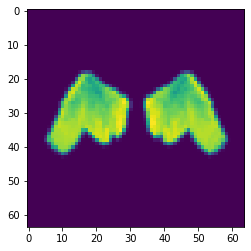

In [4]:
img=Image.open('test1.png').convert('L')
hash = imagehash.average_hash(img)
img1 = io.imread('test1.png', as_gray=True)
scipy.misc.imsave('test1.png',img1)
plt.imshow(img)

In [186]:
print(hash)
print(type(hash))
width, height = img.size
print(width,height)
key=str(hash)#.encode('ascii')
filename = "test1.png"
filename_out = "test_enc"
format = "png"



1818183c3c181818
<class 'imagehash.ImageHash'>
1280 720


In [187]:
#cipher = AES.new(key, AES.MODE_ECB)
def pad(data):
    return data + b"\x00"*(16-len(data)%16) 
 
# Maps the RGB 
def convert_to_RGB(data):
    r, g, b = tuple(map(lambda d: [data[i] for i in range(0,len(data)) if i % 3 == d], [0, 1, 2]))
    pixels = tuple(zip(r,g,b))
    return pixels
    
def process_image(filename):
    # Opens image and converts it to RGB format for PIL
    im = Image.open(filename)
    data = im.convert("L").tobytes() 
 
    # Since we will pad the data to satisfy AES's multiple-of-16 requirement, we will store the original data length and "unpad" it later.
    original = len(data) 
 
    # Encrypts using desired AES mode (we'll set it to ECB by default)
    #new = convert_to_RGB(aes_cbc_encrypt(key, pad(data))[:original]) 
    new=aes_cbc_encrypt(key, pad(data))[:original]
    # Create a new PIL Image object and save the old image data into the new image.
    im2 = Image.new(im.mode, im.size)
    im2.putdata(new)
    
    #Save image
    im2.save(filename_out+"."+format, format)
    
def aes_cbc_encrypt(key, data, mode=AES.MODE_CBC):
    IV = "A"*16  #We'll manually set the initialization vector to simplify things
    aes = AES.new(key, mode, IV)
    new_data = aes.encrypt(data)
    return new_data


In [188]:
process_image(filename)

'L'

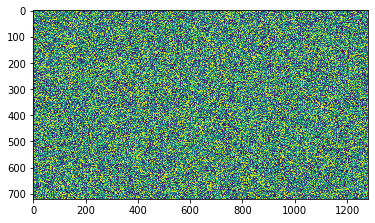

In [189]:
enc_image = Image.open("test_enc.png")
plt.imshow(enc_image)
enc_image.mode

In [190]:
arr = np.asarray(enc_image)

In [191]:
#arr=arr.flatten()
#arr=arr.reshape(-1,2)
rows,col=arr.shape
new_arr=zeros([rows,col])
print(rows,col)

720 1280


In [192]:
#new_arr=zeros([rows,col])
#new_arr.shape

In [193]:
def ran(x,y,i,M,N,d1,d2):
    pix=arr1[(x-d1*i)%M,(y-d2*i)%N]^arr1[(x+d1*i)%M,(y+d2*i)%N]
    return pix

In [194]:
n=int(input("enter the number of shares to b generated:"))
d1=(int(width)-1)//(2*n)
d2=(int(height)-1)//(2*n)
d1=random.randint(1,d1)
d2=random.randint(1,d2)
w=rows
h=col
for i in range(n):
    new_arr=np.ones([rows,col])
    for x in range(rows):
        for y in range(col):
            new_arr[x][y]=ran(x,y,i,w,h,d1,d2)
    scipy.misc.imsave('gen/R{}.png'.format(i), new_arr)

enter the number of shares to b generated:4


/home/darshan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  del sys.path[0]


generated R's:



/home/darshan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


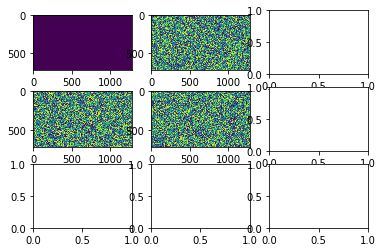

In [195]:
fig,ax = plt.subplots(n-1,n-1)
print("generated R's:\n")
filenames=['gen/R{}.png'.format(i) for i in range(n)] #or glob or any other way to describe filenames
for i in range(n):
    with open(filenames[i],'rb') as f:
        image=Image.open(f)
        ax[i%2][i//2].imshow(image)
fig.show()

In [196]:
def gen_share(no):
    for i in range(no):
        r1=Image.open("gen/R{}.png".format(i))
        arr_r1 = np.asarray(r1)
        if i==(n-1):
            r2=Image.open("gen/R0.png")
        else:
            r2=Image.open("gen/R{}.png".format(i+1))
        arr_r2 = np.asarray(r2)
        arr_i1 = np.asarray(img)
        share=zeros([rows,col])
        for x in range(rows):
            for y in range(col):
                share[x][y]=arr_i1[x][y]^arr_r1[x][y]^arr_r2[x][y]
        scipy.misc.imsave('Shares/share{}.png'.format(i), share)     

In [197]:
gen_share(n)

/home/darshan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  from ipykernel import kernelapp as app


generated shares:



/home/darshan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


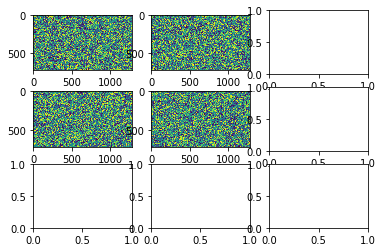

In [198]:
print("generated shares:\n")
fig,ax = plt.subplots(n-1,n-1)

filenames=['Shares/share{}.png'.format(i) for i in range(n)] #or glob or any other way to describe filenames
for i in range(n):
    with open(filenames[i],'rb') as f:
        image=Image.open(f)
        ax[i%2][i//2].imshow(image)
fig.show()

In [199]:
dec_shares=int(input("enter the number of shares to be considered:"))

enter the number of shares to be considered:4


In [219]:
def gen_decr(shares):
    for i in range(shares):
        r1=Image.open("gen/R0.png")
        rows,col=r1.size
        #print(rows,col)
        arr_r1 = np.asarray(r1)
        share=zeros([col,rows])
        for x in range(col):
            for y in range(rows):
                share[x][y]=arr_r1[x][y]*1
        for i in range(1,dec_shares):
            r2=Image.open("gen/R{}.png".format(i))
            arr_r2 = np.asarray(r2)
            for x in range(col):
                for y in range(rows):
                    share[x][y]=int(share[x][y])^int(arr_r2[x][y])
    scipy.misc.imsave('R_dec.png'.format(i),share)

In [218]:
gen_decr(dec_shares)

1280 720
1280 720
1280 720
1280 720


/home/darshan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [221]:
img=Image.open('R_dec.png').convert('L')
hash = imagehash.average_hash(img)
dec_key=str(hash)
print("dec hash key : ",dec_key)

dec hash key :  430edf896c3c9e7f


In [222]:
key=str(hash)#.encode('ascii')
filename = "R_dec.png"
filename_out = "test_dec"
format = "png"
process_image(filename)

'L'

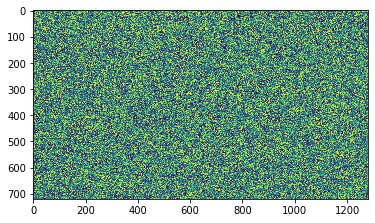

In [223]:
enc_image = Image.open("test_dec.png")
plt.imshow(enc_image)
enc_image.mode

In [224]:
for i in range(dec_shares):
    new_arr=np.ones([rows,col])
    for x in range(rows):
        for y in range(col):
            new_arr[x][y]=ran(x,y,i,w,h,d1,d2)
    scipy.misc.imsave('dec/gen/R{}.png'.format(i), new_arr)

/home/darshan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


generated R's:



/home/darshan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


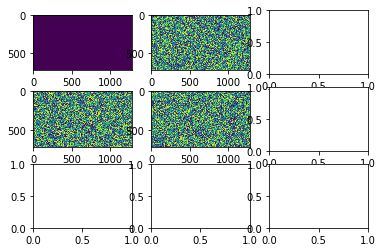

In [225]:
fig,ax = plt.subplots(n-1,n-1)
print("generated R's:\n")
filenames=['dec/gen/R{}.png'.format(i) for i in range(n)] #or glob or any other way to describe filenames
for i in range(n):
    with open(filenames[i],'rb') as f:
        image=Image.open(f)
        ax[i%2][i//2].imshow(image)
fig.show()